In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [48]:
control_data = pd.read_csv('control_group.csv', sep=';')
test_data = pd.read_csv('test_group.csv', sep=';')

In [49]:
control_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
test_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [51]:
control_data['Date'] = pd.to_datetime(control_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

In [52]:
# Menyesuaikan nama kolom pada control_data dan test_data

control_data.columns = ["Campaign Name", "Date", "Amount Spent", "Number of Impressions",\
                        "Reach", "Website Clicks", "Searches Received", "Content Viewed",\
                        "Added to Cart","Purchases"]
test_data.columns = ["Campaign Name", "Date", "Amount Spent", "Number of Impressions",\
                     "Reach", "Website Clicks", "Searches Received", "Content Viewed",\
                     "Added to Cart","Purchases"]

In [53]:
control_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64

In [54]:
test_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

In [55]:
col_null = ['Number of Impressions','Reach','Website Clicks','Searches Received','Content Viewed','Added to Cart','Purchases']

for i in col_null:
  control_data[i] = control_data[i].fillna(control_data[i].mean())

In [56]:
control_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

In [57]:
# merge control_data dan test_data

ab_data = control_data.merge(test_data, how='outer').sort_values(by='Date')
ab_data = ab_data.reset_index(drop=True)
ab_data.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/reshape/merge.py:1204: UserWarning:

You are merging on int and float columns where the float values are not equal to their int representation



,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,2019-01-08,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,2019-01-08,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Control Campaign,2019-02-08,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
3,Test Campaign,2019-02-08,2542,100719.0,91236.0,4657.0,2359.0,1548.0,879.0,677.0
4,Control Campaign,2019-03-08,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0


In [58]:
ab_data['Amount Spent'] = ab_data['Amount Spent'].astype(float)

In [59]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Campaign Name          60 non-null     object        
 1   Date                   60 non-null     datetime64[ns]
 2   Amount Spent           60 non-null     float64       
 3   Number of Impressions  60 non-null     float64       
 4   Reach                  60 non-null     float64       
 5   Website Clicks         60 non-null     float64       
 6   Searches Received      60 non-null     float64       
 7   Content Viewed         60 non-null     float64       
 8   Added to Cart          60 non-null     float64       
 9   Purchases              60 non-null     float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 4.8+ KB


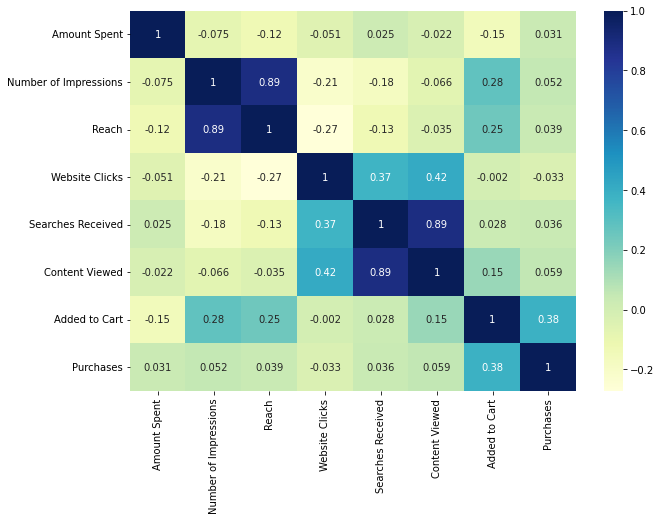

In [60]:
plt.figure(figsize=(10,7))
sns.heatmap(ab_data.corr(), cmap="YlGnBu", annot=True)

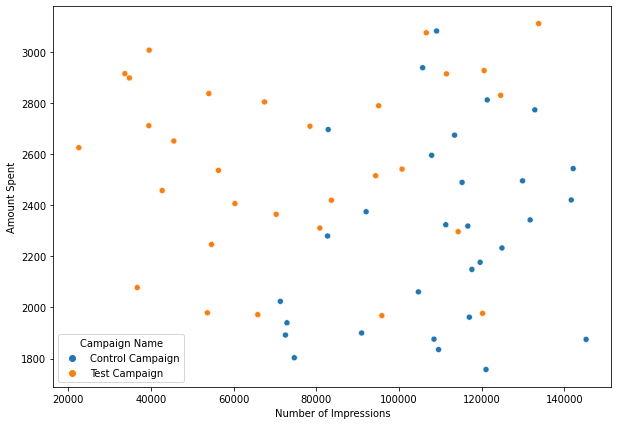

In [61]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="Number of Impressions", y="Amount Spent", data=ab_data, hue='Campaign Name')

Terlihat hubungan antara Number of Impressions dengan Amount Spent dari kedua campaign.

Control campaign terlihat lebih baik dibandingkan dengan test campaign

In [93]:
# Fungsi untuk menampilkan values pada barplot

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

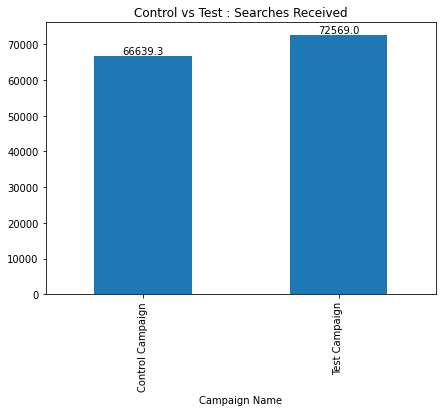

In [97]:
# Control vs Test : Searches Received

a = ab_data.groupby('Campaign Name')['Searches Received'].sum().plot.bar(title='Control vs Test : Searches Received', figsize=(7,5))
show_values(a)

Test Campaign lebih banyak dicari di internet dibandingkan dengan Control Campaign

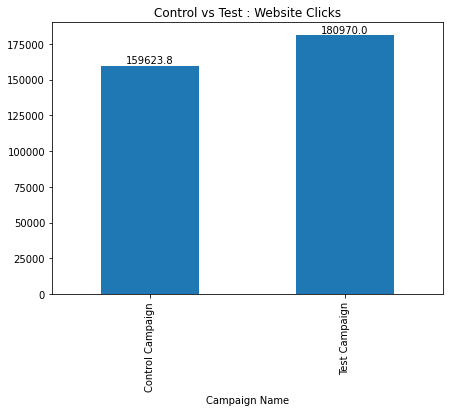

In [98]:
# Control vs Test : Website Clicks

b = ab_data.groupby('Campaign Name')['Website Clicks'].sum().plot.bar(title='Control vs Test : Website Clicks', figsize=(7,5))
show_values(b)

Test Campaign lebih banyak jumlah website click dibandingkan dengan Control Campaign

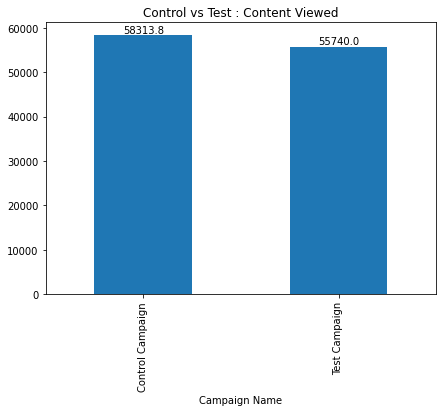

In [99]:
# Control vs Test : Content Viewed

c = ab_data.groupby('Campaign Name')['Content Viewed'].sum().plot.bar(title='Control vs Test : Content Viewed', figsize=(7,5))
show_values(c)

Pada perbandingan Content Viewed, Control Campaign memiliki lebih banyak audience dibandingkan dengan Test Campaign, padahal pada website click control campaign rendah

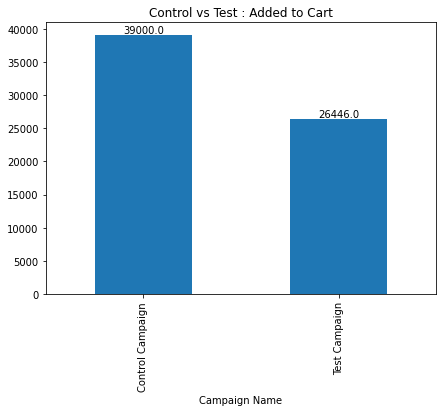

In [100]:
# Control vs Test : Added to Cart

d = ab_data.groupby('Campaign Name')['Added to Cart'].sum().plot.bar(title='Control vs Test : Added to Cart', figsize=(7,5))
show_values(d)

Meskipun control campaign mendapat website click yang rendah, tapi labih banyak produk yang masuk ke cart

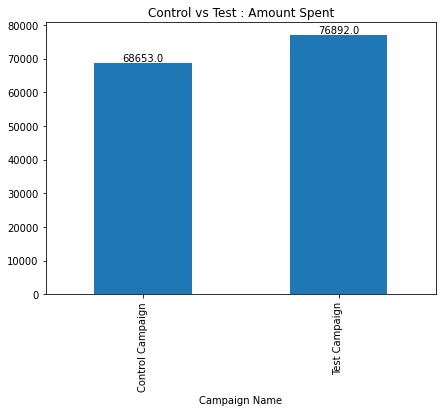

In [101]:
# Control vs Test : Amount Spent

e = ab_data.groupby('Campaign Name')['Amount Spent'].sum().plot.bar(title='Control vs Test : Amount Spent', figsize=(7,5))
show_values(e)

Amount spent pada test campaign lebih tinggi dibanding control campaign. Sebelumnya kita telah melihat bahwa control campaign memiliki lebih banyak content viewed dan produk yang masuk ke cart, berarti control campaign lebih efisien dibanding dengan test campaign

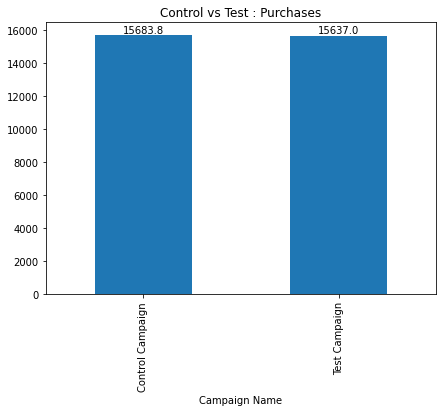

In [102]:
# Control vs Test : Purchases

f = ab_data.groupby('Campaign Name')['Purchases'].sum().plot.bar(title='Control vs Test : Purchases', figsize=(7,5))

show_values(f)

Pada pembelian yang terjadi, hanya terdapat sedikit perbedaan diantara kedua campaign. Control campaign menghasilkan lebih banyak penjualan dengan lebih sedikit Amount Spent. 

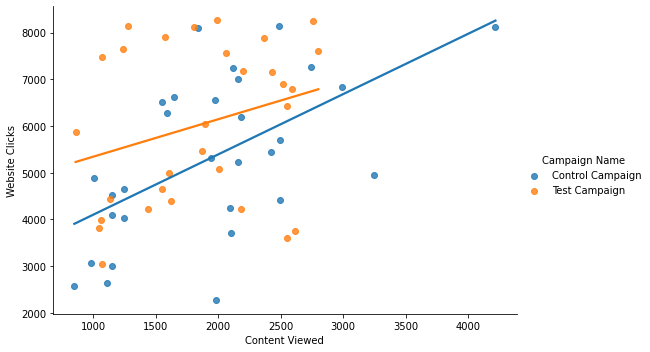

In [106]:
sns.lmplot(data=ab_data, x="Content Viewed", y="Website Clicks", hue="Campaign Name", ci=None, height=5, aspect=1.5)

Test Campaign memiliki lebih banyak website click, tapi untuk engagement dari website click adalah control campaign karena mendapatkan content wiew yang lebih banyak. 

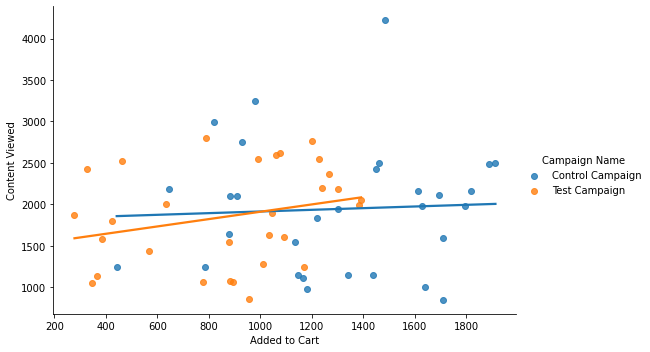

In [107]:
sns.lmplot(data=ab_data, x="Added to Cart", y="Content Viewed", hue="Campaign Name", ci=None, height=5, aspect=1.5)

control campaign masih yang lebih baik untuk produk yang masuk ke keranjang

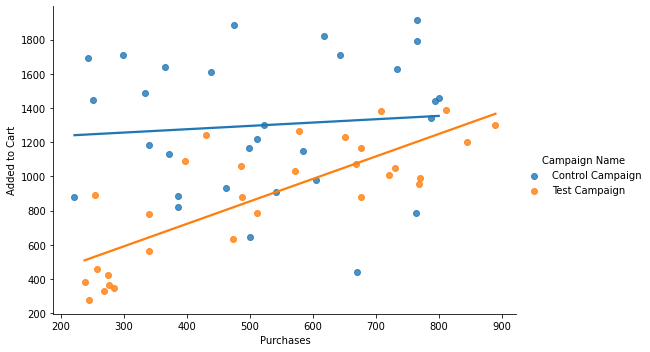

In [108]:
sns.lmplot(data=ab_data, x="Purchases", y="Added to Cart", hue="Campaign Name", ci=None, height=5, aspect=1.5)

Meskipun control campaign memiliki produk yang lebih banyak didalam keranjang, namun test camapaign memiliki *conversation rate yang lebih tinggi. 

*persentase efektivitas halaman bisnis untuk menarik pengunjung melakukan sebuah tindakan

Kesimpulan :

Dari hasil analisis diatas, didapatkan bahwa control campaign memiliki lebih banyak penjualan dan engagement dari pengunjung, produk yang dilihat menghasilkan banyak juga produk yang masuk ke keranjang belanja. Tapi untuk conversation rate masih lebih tinggi test campaign, persentase produk yang masuk ke keranjang dan dibeli lebih tinggi daripada control campaign. Test campaign lebih baik dari barang yang dilihat dan masuk ke keranjang, dan control campaign lebih banyak penjualan dari keseluruhan. 

Test campaign bisa digunakan untuk market dan produk yang lebih spesifik, sedangkan Control campaign bisa untuk berbagai produk yang lebih luas marketnya. 